## **Dataset:** https://www.kaggle.com/datasets/andrewmvd/face-mask-detection/code?select=images

In [1]:
#upload kaggle.json
from google.colab import files
files.upload()
print('Uploaded')

Saving kaggle.json to kaggle.json
Uploaded


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d andrewmvd/face-mask-detection

 99% 392M/398M [00:02<00:00, 143MB/s]
100% 398M/398M [00:02<00:00, 178MB/s]


In [4]:
!unzip /content/face-mask-detection.zip -d kaggle

Archive:  /content/face-mask-detection.zip
  inflating: kaggle/annotations/maksssksksss0.xml  
  inflating: kaggle/annotations/maksssksksss1.xml  
  inflating: kaggle/annotations/maksssksksss10.xml  
  inflating: kaggle/annotations/maksssksksss100.xml  
  inflating: kaggle/annotations/maksssksksss101.xml  
  inflating: kaggle/annotations/maksssksksss102.xml  
  inflating: kaggle/annotations/maksssksksss103.xml  
  inflating: kaggle/annotations/maksssksksss104.xml  
  inflating: kaggle/annotations/maksssksksss105.xml  
  inflating: kaggle/annotations/maksssksksss106.xml  
  inflating: kaggle/annotations/maksssksksss107.xml  
  inflating: kaggle/annotations/maksssksksss108.xml  
  inflating: kaggle/annotations/maksssksksss109.xml  
  inflating: kaggle/annotations/maksssksksss11.xml  
  inflating: kaggle/annotations/maksssksksss110.xml  
  inflating: kaggle/annotations/maksssksksss111.xml  
  inflating: kaggle/annotations/maksssksksss112.xml  
  inflating: kaggle/annotations/maksssksksss1

##Start of Code

In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
#installing opencv to read images
!pip install opencv-python

#importing necessary libraries

#importing numpy for multidimensional arrays and matrices
import numpy as np

#pandas for analysis, data cleaning 
import pandas as pd

#plyplot for visualising data on a plot, pie chart and showing image
from matplotlib import pyplot as plt

#seaborn for hist plots 
import seaborn as sns

#os for making, editing and removing directory
import os

import glob

#tensorflow for open source library to input keras 
import tensorflow as tf
print('Tensorflow version :',tf.__version__)
#keras to create artificial neural networks(CNN)
from tensorflow import keras
print('Keras version:',keras.__version__)
#cv2(open cv) in order to read  images
import cv2

#element tree to parase xml files
from xml.etree import ElementTree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Tensorflow version : 2.11.0
Keras version: 2.11.0


In [7]:
#file location of face-mask-detection/annotations into annotations
annotations='/content/kaggle/annotations'
#file location of face-mask-detection/images into images
images='/content/kaggle/images'

In [8]:
#listing all annoations into annotations_files
annotation_files= os.listdir(annotations)
annotation_files[:5]

['maksssksksss704.xml',
 'maksssksksss682.xml',
 'maksssksksss187.xml',
 'maksssksksss262.xml',
 'maksssksksss836.xml']

In [9]:
#listing all images into image_files
image_files= os.listdir(images)
image_files[:5]

['maksssksksss167.png',
 'maksssksksss98.png',
 'maksssksksss483.png',
 'maksssksksss657.png',
 'maksssksksss333.png']

In [10]:
len(annotation_files),len(image_files)

(853, 853)

##Extraction of data

In [11]:
#to extract necessary info present in the xml document in a dictionary format
info={
    'xmin':[],
    'ymin':[],
    'xmax':[],
    'ymax':[],
    'label':[],
    'file':[],
    'width':[],
    'height':[]    
}
#finding all files ending with xml
for i in glob.glob(annotations+'/*.xml'):
    #parsing all xml files with element tree
    tree=ElementTree.parse(i)
    #getting all the neceesary attribute info into the dictionary
    for element in tree.iter():
        
        if 'size' in element.tag:
            for attri in list(element):
                if 'width' in attri.tag:
                    width=int(round(float(attri.text)))
                if 'height' in attri.tag:
                    height=int(round(float(attri.text)))
    
        if 'object' in element.tag:
            for attri in list(element):
            
                if 'name' in attri.tag:
                    name=attri.text
                    info['label']+=[name]
                    info['width']+=[width]
                    info['height']+=[height]
                    #so spliting name by '/' then using last portion thats-  makssksksss.xml -{.xml} 
                    info['file']+=[i.split('/')[-1][0:-4]]

                
                if 'bndbox' in attri.tag:
                    for dimension in list(attri):
                        if 'xmin' in dimension.tag:
                            xmin=int(round(float(dimension.text)))
                            info['xmin']+=[xmin]
                        if 'ymin' in dimension.tag:
                            ymin=int(round(float(dimension.text)))
                            info['ymin']+=[ymin]
                        if 'xmax' in dimension.tag:
                            xmax=int(round(float(dimension.text)))
                            info['xmax']+=[xmax]
                        if 'ymax' in dimension.tag:
                            ymax=int(round(float(dimension.text)))
                            info['ymax']+=[ymax]
            
        

In [12]:
#for aligning dictionary in form of 2D structure in tables and columns which is mutuable
annotations_info_df = pd.DataFrame(info)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,1,162,74,246,with_mask,maksssksksss704,400,267
1,49,87,85,138,with_mask,maksssksksss704,400,267
2,114,92,172,156,with_mask,maksssksksss704,400,267
3,65,45,107,101,with_mask,maksssksksss704,400,267
4,187,120,268,202,with_mask,maksssksksss704,400,267
5,252,22,296,71,with_mask,maksssksksss704,400,267
6,338,15,380,74,with_mask,maksssksksss704,400,267
7,329,138,390,204,with_mask,maksssksksss704,400,267
8,69,80,107,114,with_mask,maksssksksss682,400,277
9,191,73,221,106,with_mask,maksssksksss682,400,277


In [13]:
#adding annotations and image file names into annotations dataframe
annotations_info_df['annotation_file']= annotations_info_df['file']+'.xml'
annotations_info_df['image_file']=annotations_info_df['file']+'.png'

annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,1,162,74,246,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
1,49,87,85,138,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
2,114,92,172,156,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
3,65,45,107,101,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
4,187,120,268,202,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
...,...,...,...,...,...,...,...,...,...,...
4067,122,80,142,104,with_mask,maksssksksss538,400,225,maksssksksss538.xml,maksssksksss538.png
4068,249,57,275,86,with_mask,maksssksksss538,400,225,maksssksksss538.xml,maksssksksss538.png
4069,146,106,157,123,with_mask,maksssksksss730,400,267,maksssksksss730.xml,maksssksksss730.png
4070,192,75,205,95,with_mask,maksssksksss730,400,267,maksssksksss730.xml,maksssksksss730.png


In [14]:
#used to render the image in  a 12:8 format
def render(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()
# since image read by opencv is in bgr format we need to convert it into rgb format
def convert_RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [15]:
# is a image at first location
annotations_info_df['image_file'].iloc[0]

'maksssksksss704.png'

In [16]:
#forming the file path of image 
image_path= '/content/kaggle/images/' + annotations_info_df['image_file'].iloc[0]
image_path

'/content/kaggle/images/maksssksksss704.png'

In [17]:
#read image through opencv which converts image to a array of 3d martrices
image153=cv2.imread(image_path)
image153

array([[[ 79, 126, 157],
        [ 84, 135, 164],
        [ 94, 144, 176],
        ...,
        [ 31,  41,  67],
        [ 31,  43,  67],
        [ 33,  45,  71]],

       [[ 88, 137, 166],
        [ 95, 147, 175],
        [106, 158, 188],
        ...,
        [ 32,  44,  70],
        [ 30,  42,  66],
        [ 33,  44,  68]],

       [[ 97, 150, 178],
        [102, 156, 187],
        [113, 166, 198],
        ...,
        [ 36,  47,  75],
        [ 32,  43,  70],
        [ 31,  42,  68]],

       ...,

       [[  6,   8,  12],
        [  4,   7,  11],
        [  6,   9,  13],
        ...,
        [ 43,  49,  66],
        [ 89, 100, 124],
        [115, 122, 143]],

       [[  4,   7,  11],
        [  5,   8,  12],
        [  7,  10,  15],
        ...,
        [ 49,  55,  70],
        [ 97, 109, 132],
        [119, 124, 146]],

       [[  4,   6,  10],
        [  5,   9,  12],
        [  8,  12,  17],
        ...,
        [ 51,  59,  75],
        [ 94, 102, 128],
        [113, 117, 139]]

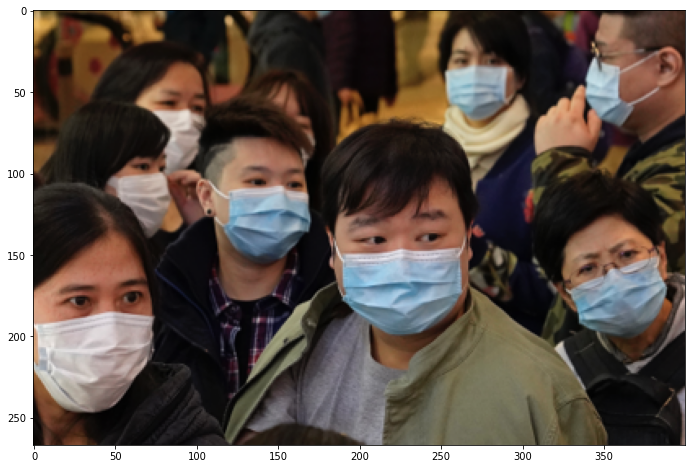

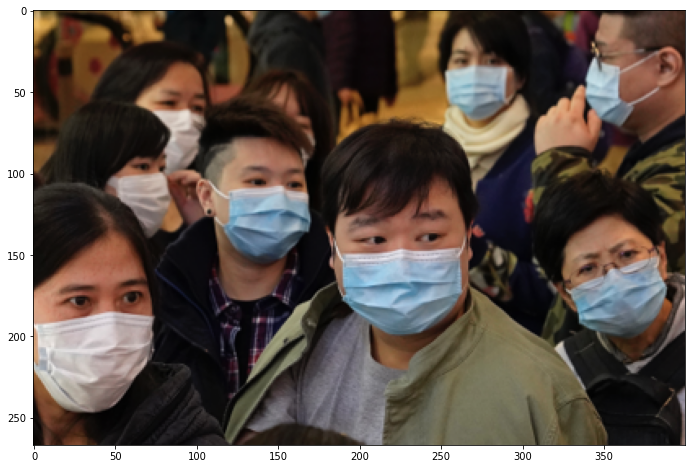

In [18]:
#rendering the image we choose in RGB format
render(convert_RGB(image153))#rendering the image we choose in RGB format
render(convert_RGB(image153))

In [19]:
#finding corresponding annotations to the image
annotation153='/content/kaggle/annotations' + annotations_info_df['annotation_file'].iloc[0]
annotation153

'/content/kaggle/annotationsmaksssksksss704.xml'

In [20]:
#returns a tuple of the number of rows, columns, and channels
image153.shape
#here three channels represent RGB

(267, 400, 3)

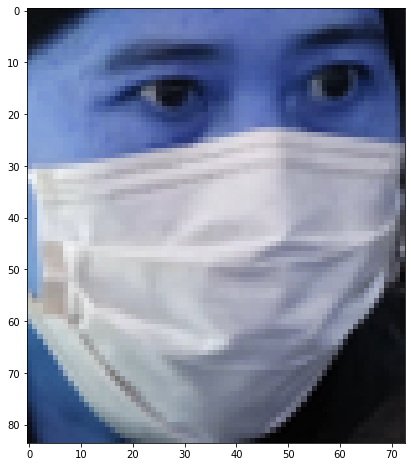

In [21]:
#Extracting information of first face from the data
x=annotations_info_df['xmin'].iloc[0]
y=annotations_info_df['ymin'].iloc[0]
width=annotations_info_df['xmax'].iloc[0]
height=annotations_info_df['ymax'].iloc[0]
#take the required slice of data from the information of first face extracted 
crop153=image153[y:height, x:width]
#rendering the image
render(crop153)

In [22]:
#After the crop ,total images should be equal to length of annotations
# which defines the number of faces present in the data

len(annotations_info_df)

4072

In [23]:
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,1,162,74,246,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
1,49,87,85,138,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
2,114,92,172,156,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
3,65,45,107,101,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
4,187,120,268,202,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
5,252,22,296,71,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
6,338,15,380,74,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
7,329,138,390,204,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png
8,69,80,107,114,with_mask,maksssksksss682,400,277,maksssksksss682.xml,maksssksksss682.png
9,191,73,221,106,with_mask,maksssksksss682,400,277,maksssksksss682.xml,maksssksksss682.png


In [24]:
os.listdir('/content/kaggle')

['annotations', 'images']

In [25]:
#making a new directory named cropped
directory= 'cropped'
parent_directory= '/content/'
os.mkdir(os.path.join(parent_directory,directory))

In [26]:
#checking if directory added 
!ls './'

cropped  face-mask-detection.zip  kaggle  kaggle.json  sample_data


In [27]:
#Adding Cropped image into annotation (just the file name)
annotations_info_df['cropped']=annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,1,162,74,246,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704
1,49,87,85,138,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704
2,114,92,172,156,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704
3,65,45,107,101,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704
4,187,120,268,202,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704
...,...,...,...,...,...,...,...,...,...,...,...
4067,122,80,142,104,with_mask,maksssksksss538,400,225,maksssksksss538.xml,maksssksksss538.png,maksssksksss538
4068,249,57,275,86,with_mask,maksssksksss538,400,225,maksssksksss538.xml,maksssksksss538.png,maksssksksss538
4069,146,106,157,123,with_mask,maksssksksss730,400,267,maksssksksss730.xml,maksssksksss730.png,maksssksksss730
4070,192,75,205,95,with_mask,maksssksksss730,400,267,maksssksksss730.xml,maksssksksss730.png,maksssksksss730


In [28]:
#traversing through all the annonations present
for i in range(len(annotations_info_df)):
    #selecting the filepath of a single image
    image_filepath= images +'/'+ annotations_info_df['image_file'].iloc[i]
    #reading the image
    image=cv2.imread(image_filepath)
    #adding the part and .png at the end of every file
    #example- maksssksksss212 will be given a number according to index and .png will be added
    #for it to become maksssksksss212-4071.png   
    annotations_info_df['cropped'].iloc[i]= annotations_info_df['cropped'].iloc[i] +'-'+ str(i) + '.png'
    cropped_image_filename= annotations_info_df['cropped'].iloc[i]
    #getting the dimension needed to get a cropped images
    xmin= annotations_info_df['xmin'].iloc[i]
    ymin= annotations_info_df['ymin'].iloc[i]
    xmax= annotations_info_df['xmax'].iloc[i]
    ymax= annotations_info_df['ymax'].iloc[i]
    #cropping the image to get a single face and it  to croppedimage 
    croppedimage= image[ymin:ymax, xmin:xmax]
    #saving the cropped image to the designated directory
    cv2.imwrite(os.path.join('./cropped',cropped_image_filename),croppedimage)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,1,162,74,246,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704-0.png
1,49,87,85,138,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704-1.png
2,114,92,172,156,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704-2.png
3,65,45,107,101,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704-3.png
4,187,120,268,202,with_mask,maksssksksss704,400,267,maksssksksss704.xml,maksssksksss704.png,maksssksksss704-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,122,80,142,104,with_mask,maksssksksss538,400,225,maksssksksss538.xml,maksssksksss538.png,maksssksksss538-4067.png
4068,249,57,275,86,with_mask,maksssksksss538,400,225,maksssksksss538.xml,maksssksksss538.png,maksssksksss538-4068.png
4069,146,106,157,123,with_mask,maksssksksss730,400,267,maksssksksss730.xml,maksssksksss730.png,maksssksksss730-4069.png
4070,192,75,205,95,with_mask,maksssksksss730,400,267,maksssksksss730.xml,maksssksksss730.png,maksssksksss730-4070.png


In [30]:
#listing all images into cropped
cropped=os.listdir( './cropped')
cropped[:10]

['maksssksksss320-234.png',
 'maksssksksss792-2637.png',
 'maksssksksss240-3089.png',
 'maksssksksss674-3159.png',
 'maksssksksss77-3037.png',
 'maksssksksss621-3008.png',
 'maksssksksss752-2483.png',
 'maksssksksss58-3323.png',
 'maksssksksss255-2600.png',
 'maksssksksss297-1903.png']

In [31]:
#check to see if total cropped images are 4072 as stated earlier
print('Total croped images are: ',format(len(cropped)))

Total croped images are:  4072


In [32]:
#getting the file name
annotations_info_df['cropped'].iloc[0]

'maksssksksss704-0.png'

In [33]:
#getting location of the file
cropped153_0path= './cropped/'+annotations_info_df['cropped'].iloc[0]
cropped153_0path

'./cropped/maksssksksss704-0.png'

In [34]:
#reading the image using cv2 
cropped153_0= cv2.imread(cropped153_0path)
cropped153_0

array([[[14, 17, 17],
        [13, 15, 17],
        [13, 15, 18],
        ...,
        [ 9, 10, 15],
        [10, 11, 16],
        [12, 13, 17]],

       [[13, 16, 16],
        [13, 16, 17],
        [14, 17, 20],
        ...,
        [ 7,  9, 14],
        [10, 12, 17],
        [11, 12, 16]],

       [[12, 14, 17],
        [15, 17, 20],
        [14, 17, 20],
        ...,
        [ 6,  8, 13],
        [10, 11, 18],
        [12, 12, 17]],

       ...,

       [[12, 14, 25],
        [20, 32, 60],
        [34, 57, 99],
        ...,
        [32, 29, 32],
        [34, 30, 33],
        [33, 30, 32]],

       [[10, 12, 18],
        [16, 24, 45],
        [32, 51, 94],
        ...,
        [35, 32, 34],
        [36, 33, 35],
        [31, 27, 30]],

       [[ 9, 11, 16],
        [14, 19, 35],
        [29, 45, 81],
        ...,
        [29, 26, 29],
        [32, 29, 31],
        [29, 25, 28]]], dtype=uint8)

In [35]:
#getting height, width and channels of the image
cropped153_0.shape

(84, 73, 3)

##Train Test Split

In [36]:
#spliting the data into 80-20% for train and test respectively
from sklearn.model_selection import train_test_split
train_df,test_df= train_test_split(annotations_info_df,test_size=0.20)

In [37]:
#getting the shape of the dataframe
train_df.shape,test_df.shape

((3257, 11), (815, 11))

In [38]:
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
1913,354,10,367,20,with_mask,maksssksksss297,400,221,maksssksksss297.xml,maksssksksss297.png,maksssksksss297-1913.png
3241,96,226,199,350,with_mask,maksssksksss403,301,400,maksssksksss403.xml,maksssksksss403.png,maksssksksss403-3241.png
2602,88,78,97,90,with_mask,maksssksksss255,400,225,maksssksksss255.xml,maksssksksss255.png,maksssksksss255-2602.png
3755,299,58,315,81,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3755.png
1159,62,71,76,85,with_mask,maksssksksss800,400,267,maksssksksss800.xml,maksssksksss800.png,maksssksksss800-1159.png


In [39]:
#checking for the number of categories of the image label
classes= list(train_df['label'].unique())
classes

['with_mask', 'without_mask', 'mask_weared_incorrect']

In [40]:
train_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
1913,354,10,367,20,with_mask,maksssksksss297,400,221,maksssksksss297.xml,maksssksksss297.png,maksssksksss297-1913.png
3241,96,226,199,350,with_mask,maksssksksss403,301,400,maksssksksss403.xml,maksssksksss403.png,maksssksksss403-3241.png
2602,88,78,97,90,with_mask,maksssksksss255,400,225,maksssksksss255.xml,maksssksksss255.png,maksssksksss255-2602.png
3755,299,58,315,81,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3755.png
1159,62,71,76,85,with_mask,maksssksksss800,400,267,maksssksksss800.xml,maksssksksss800.png,maksssksksss800-1159.png
...,...,...,...,...,...,...,...,...,...,...,...
2783,350,79,377,102,with_mask,maksssksksss376,400,221,maksssksksss376.xml,maksssksksss376.png,maksssksksss376-2783.png
2046,391,127,400,138,with_mask,maksssksksss518,400,225,maksssksksss518.xml,maksssksksss518.png,maksssksksss518-2046.png
1346,103,77,111,85,without_mask,maksssksksss603,400,278,maksssksksss603.xml,maksssksksss603.png,maksssksksss603-1346.png
2776,91,188,201,334,with_mask,maksssksksss646,301,400,maksssksksss646.xml,maksssksksss646.png,maksssksksss646-2776.png


In [41]:
#Doing object classification on single random image to see if person 
#in the image is masked ,no masked and incorrectly worn
train_df[train_df['file']=='maksssksksss52']['label'].unique()

array(['without_mask', 'with_mask', 'mask_weared_incorrect'], dtype=object)

In [42]:
#reading the image
image52_path= images+'/maksssksksss52.png'
image52= cv2.imread(image52_path)
image52

array([[[201, 186, 190],
        [178, 169, 171],
        [126, 120, 121],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[178, 164, 164],
        [168, 159, 157],
        [163, 157, 154],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[146, 135, 132],
        [145, 138, 134],
        [148, 144, 139],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       ...,

       [[ 29,  30,  33],
        [ 29,  30,  33],
        [ 29,  30,  33],
        ...,
        [ 42,  50,  58],
        [ 40,  48,  56],
        [ 42,  51,  59]],

       [[ 31,  32,  33],
        [ 31,  32,  33],
        [ 31,  33,  33],
        ...,
        [ 41,  49,  57],
        [ 41,  49,  57],
        [ 45,  53,  61]],

       [[ 34,  35,  36],
        [ 35,  37,  38],
        [ 37,  39,  40],
        ...,
        [ 42,  50,  58],
        [ 39,  47,  55],
        [ 44,  52,  60]]

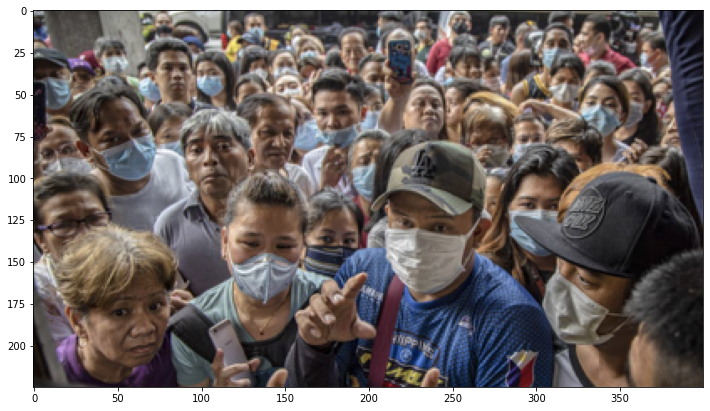

In [43]:
#rendering the image in RGB format
image52_rgb=convert_RGB(image52)
render(image52_rgb)

In [44]:
#finding annotations corresponding to the image 
image52_df=train_df[train_df['file']== 'maksssksksss52']
image52_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
4046,276,9,284,19,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4046.png
4050,328,51,352,77,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4050.png
4041,250,4,261,16,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4041.png
4008,6,117,47,149,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4008.png
4029,145,42,160,56,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4029.png
4025,73,5,84,16,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4025.png
4020,74,31,96,53,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4020.png
4022,41,23,58,40,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4022.png
4026,94,22,103,33,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4026.png
4015,209,119,262,170,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-4015.png


In [45]:
#adding the persons into withmask ,withoutmask, incorrectly worn lists 
withmaskl,withoutmaskl,incorrectl=[],[],[]
for i in range(len(image52_df)):
    bb= [image52_df['xmin'].iloc[i],
        image52_df['ymin'].iloc[i],
        image52_df['xmax'].iloc[i],
        image52_df['ymax'].iloc[i]]
    if image52_df['label'].iloc[i]== 'with_mask':
        withmaskl.append(bb)
    elif image52_df['label'].iloc[i]=='without_mask':
        withoutmaskl.append(bb)
    else:
        incorrectl.append(bb)
#creating a dictionary with the lists above
foundobjectdict= {
    'With Mask': withmaskl,
    'Without Mask': withoutmaskl,
    'Incorrectly Worn': incorrectl
}
foundobjectdict

{'With Mask': [[328, 51, 352, 77],
  [250, 4, 261, 16],
  [145, 42, 160, 56],
  [73, 5, 84, 16],
  [41, 23, 58, 40],
  [94, 22, 103, 33],
  [209, 119, 262, 170],
  [284, 111, 316, 150],
  [205, 6, 210, 18],
  [116, 132, 161, 175],
  [127, 31, 142, 44],
  [129, 7, 139, 19],
  [97, 34, 115, 53],
  [362, 23, 370, 36],
  [154, 13, 163, 24],
  [270, 33, 281, 49],
  [268, 110, 279, 127],
  [303, 147, 352, 203],
  [39, 65, 75, 103],
  [143, 29, 160, 42],
  [310, 39, 329, 58],
  [76, 69, 92, 88],
  [260, 74, 285, 97],
  [197, 37, 214, 58],
  [2, 77, 35, 99],
  [159, 21, 171, 32],
  [157, 61, 173, 84],
  [1, 34, 24, 61],
  [304, 16, 322, 36],
  [191, 84, 208, 117],
  [286, 73, 307, 90],
  [63, 37, 77, 56],
  [161, 130, 195, 163],
  [352, 48, 366, 71]],
 'Without Mask': [[276, 9, 284, 19],
  [6, 117, 47, 149],
  [74, 31, 96, 53],
  [185, 20, 200, 37],
  [378, 61, 388, 84],
  [246, 51, 256, 72],
  [37, 166, 84, 214],
  [131, 67, 157, 97],
  [221, 51, 246, 77]],
 'Incorrectly Worn': [[168, 57, 196

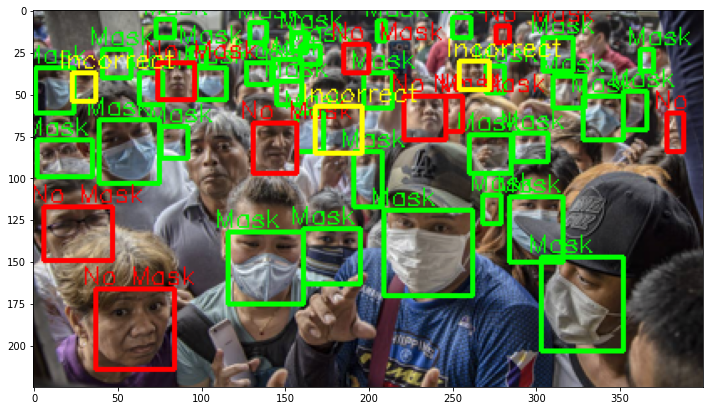

In [46]:
#traversing through the dictionary 
for key, value in foundobjectdict.items():
    #assigning color according to label the person has
    for i in range(len(value)):
        #by default , color and text for masked person to be: 'green' and 'mask' 
        color= (0,255,0)
        text='Mask'
        if key=='Without Mask':
            #color and text for unmasked person to be: 'red' and 'no mask'
            color= (255,0,0)
            text='No Mask'
        elif key== 'Incorrectly Worn':
            #color text for incorrectly worn masked person to be: 'yellow' and 'incorrect'
            color= (255,255,0)
            text='Incorrect'
        #finfing corners of starting line and ending lines of the face of person
        start=(value[i][0],value[i][1])
        end=(value[i][2],value[i][3])
        #creating a rectangle across the face according to the color
        cv2.rectangle(image52_rgb,start,end,color=color,thickness=2)
        #putting text on image with the rectangle
        cv2.putText(image52_rgb, org= (value[i][0]-8,value[i][1]-3),text=text,
                   fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=color)
#rendering image with the updates on the image
render(image52_rgb)

In [47]:
#counted occurence of the label of images 
train_df['label'].value_counts()

with_mask                2591
without_mask              572
mask_weared_incorrect      94
Name: label, dtype: int64

In [48]:

#creating a sorted label into a Two-dimensional mutable dataframe with index 0,1,2 
sortedlabel=pd.DataFrame(train_df['label'].value_counts()).reset_index()
sortedlabel.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sortedlabel

,label,count
0,with_mask,2591
1,without_mask,572
2,mask_weared_incorrect,94


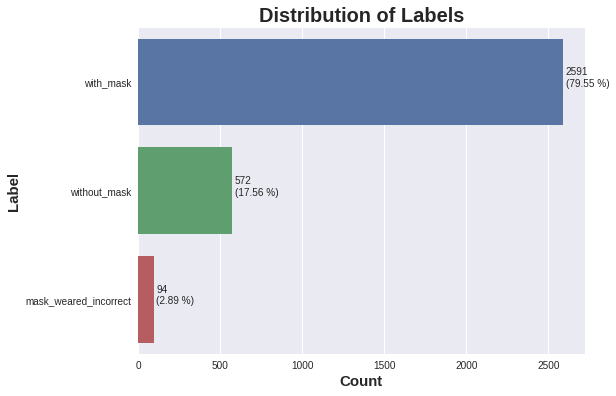

In [49]:
#plotting the barplot of the label occurred
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))

barplot = sns.barplot(x = 'count', y = 'label', data = sortedlabel)
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    #to calculate percentage of each label in the data specified
    percentage = round(width * 100 / sum(sortedlabel['count']), 2)
    #putting text about the numer and the percentage corresponding to each label
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [50]:
#getting the width,height and channels of first image
croppedpath = './cropped/' + train_df['cropped'].iloc[0]
croppedimage = cv2.imread(croppedpath)
croppedimage.shape

(10, 13, 3)

In [51]:
#adding image width and image height of every image to the list 
imagewidth=[]
imageheight=[]
#traversing through the all image
for i in range(len(train_df)):
    croppedimagepath= './cropped/'+train_df['cropped'].iloc[i] 
    croppedimage=cv2.imread(croppedimagepath)
    #adding image height and width of the image to list
    imagewidth.append(croppedimage.shape[0])
    imageheight.append(croppedimage.shape[1])

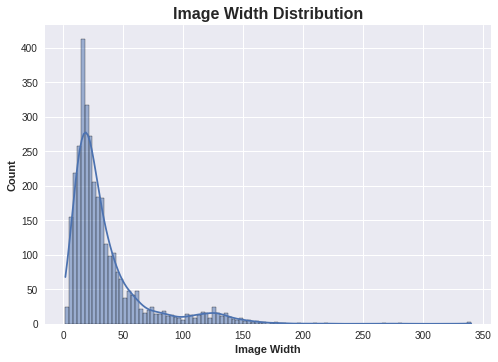

In [52]:
#plotting histogram of imagewidth
sns.histplot(imagewidth,kde=True)
plt.title('Image Width Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Width',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

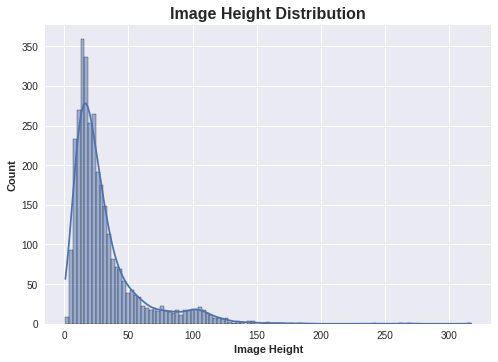

In [53]:
#plotting histogram of imageheight
sns.histplot(imageheight,kde=True)
plt.title('Image Height Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Height',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

##Preprocessing

In [54]:
#taking median of imagewidth and imageheight as targetimage size 
targetimage=(int(np.median(imagewidth)),int(np.median(imageheight)))
targetimage

(24, 22)

In [55]:
!pip install Keras-Preprocessing
from keras_preprocessing.image import ImageDataGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.4 MB/s eta 0:00:00


In [56]:
# using imagedatagenerator expand the training dataset in order 
# to improve the performance and ability of the model to generalize.

#rescale=1./255 will convert the pixels in range [0,255] to range [0,1], thus normalising the data and
#contributing to total losses , moreover we are also spliting image generator for 25 percent validation set.
train_image_generator= ImageDataGenerator(rescale= 1. / 255. , validation_split=0.25)
#train image generator to generate batches of tensor train image dataset with augmentation.
train_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df, 
    directory='./cropped',
    x_col='cropped',
    y_col='label',
    #using 75%  dataset as training set
    subset='training',
    #size of batch of data being 32
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode= 'categorical',
    target_size = targetimage
    )
#valid image generator to generate batches of tensor valid image dataset with augmentation.
valid_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory= './cropped',
    x_col='cropped',
    y_col='label',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 2443 validated image filenames belonging to 3 classes.
Found 814 validated image filenames belonging to 3 classes.


In [57]:
#also creating image generator for test dataset for randomness
test_image_generator= ImageDataGenerator(rescale = 1./255.)
#test image generator with augmented data to test acccuracy of the model
test_generator= train_image_generator.flow_from_dataframe(
    #will use test_df as dataframe
    dataframe=test_df,
    directory= './cropped',
    x_col='cropped',
    y_col='label',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 815 validated image filenames belonging to 3 classes.


###Modelling

In [58]:
#taking input shape as median of imagewidth,median of imageheight, 3 as channels because colours are RGB
inputshape= [int(np.median(imagewidth)),int(np.median(imageheight)),3]
inputshape

[24, 22, 3]

In [59]:
#using a sequential model as there exist only one input that is the image and
#only one output that is whether it is with mask, no mask or incorrectly worn mask
model1= keras.models.Sequential([
    #Conv2D creates a convolution kernel that is combined with the layer input to produce a tensor of outputs
    #here filter provides a measure for a region of the input to resemble a feature
    #kernel size specifies the height and width of the 2D convolution window
    #activation has activation function relu(Rectified Linear Unit) which keeps all negative values to be zero and all other values to be constant
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=inputshape),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    #MaxPool2D downsamples the input along its height and width by taking the maximum value over an input matrix for each channel of the input
    # pool_size signify window size (matrix window ) over which to take the maximum
    #padding valid ensure that no padding is necessary for model.
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    #flatten function will flattens the multi-dimensional input tensors into a single dimension
    keras.layers.Flatten(),
    #Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer
    #unit size decides  the dimensionality of the output space which is 3 in this case
    #activation function softmax has been used as class is of size 3 and softmax predicts a multinomial probability distribution
    keras.layers.Dense(units=len(classes),activation='softmax')
    
    
])

In [60]:
#compiling the model by configuring the model with losses and metrics
#loss function used to find deviation in learning process;
#here categoricalcrossentrophy used as loss function because it is for multi-class classification model where there exists two or more output labels.
#optimiser optimizes the input weights by comparing the prediction and the loss function,Adam optimization is a stochastic gradient descent method as its faster
#Metrics is used to evaluate the performance of the model here mterics.recall recalls the prediction on basis of labels
model1.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',keras.metrics.Recall()])
#fit trains the model for a fixed number of epochs
#here input is train_generator, epochs represents one complete pass of the training dataset through the algorithm
#steps_per_epoch is total number of batches of samples before declaring one epoch finished so the model goes through all the test generator data once in our case
#validation data is data on which to evaluate the loss and any model metrics at the end of each epoch, model is not trained on it
#validation steps is total number of batches of samples to draw before stopping when performing validation at the end of every epoch
history1=model1.fit(train_generator,epochs=10,steps_per_epoch=len(train_generator),
                   validation_data=valid_generator,validation_steps=len(valid_generator))

Epoch 1/10
77/77 [==============================] - 18s 62ms/step - loss: 0.6285 - accuracy: 0.7777 - recall: 0.6635 - val_loss: 0.5076 - val_accuracy: 0.8034 - val_recall: 0.8034
Epoch 2/10
77/77 [==============================] - 3s 44ms/step - loss: 0.3528 - accuracy: 0.8682 - recall: 0.8526 - val_loss: 0.2915 - val_accuracy: 0.9128 - val_recall: 0.9005
Epoch 3/10
77/77 [==============================] - 3s 39ms/step - loss: 0.2632 - accuracy: 0.9218 - recall: 0.9079 - val_loss: 0.2599 - val_accuracy: 0.9140 - val_recall: 0.9103
Epoch 4/10
77/77 [==============================] - 3s 34ms/step - loss: 0.2453 - accuracy: 0.9243 - recall: 0.9149 - val_loss: 0.2445 - val_accuracy: 0.9263 - val_recall: 0.9165
Epoch 5/10
77/77 [==============================] - 2s 28ms/step - loss: 0.2268 - accuracy: 0.9275 - recall: 0.9202 - val_loss: 0.2280 - val_accuracy: 0.9238 - val_recall: 0.9189
Epoch 6/10
77/77 [==============================] - 2s 23ms/step - loss: 0.2116 - accuracy: 0.9341 - rec

In [61]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result1=pd.DataFrame(history1.history)
result1

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.628462,0.777732,0.663528,0.507625,0.803440,0.803440
1,0.352783,0.868195,0.852640,0.291512,0.912776,0.900491
2,0.263161,0.921817,0.907900,0.259938,0.914005,0.910319
3,0.245321,0.924273,0.914859,0.244522,0.926290,0.916462
4,0.226769,0.927548,0.920180,0.228024,0.923833,0.918919
5,0.211633,0.934097,0.926729,0.222225,0.929975,0.926290
6,0.198280,0.936963,0.934097,0.208719,0.933661,0.928747
7,0.199175,0.940237,0.933688,0.221487,0.937346,0.934889
8,0.199706,0.936553,0.932051,0.202906,0.938575,0.934889
9,0.192237,0.938191,0.933279,0.194848,0.945946,0.942260


<AxesSubplot:>

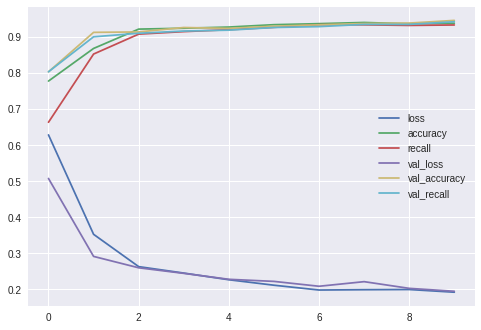

In [62]:
#plotting the result
result1.plot()

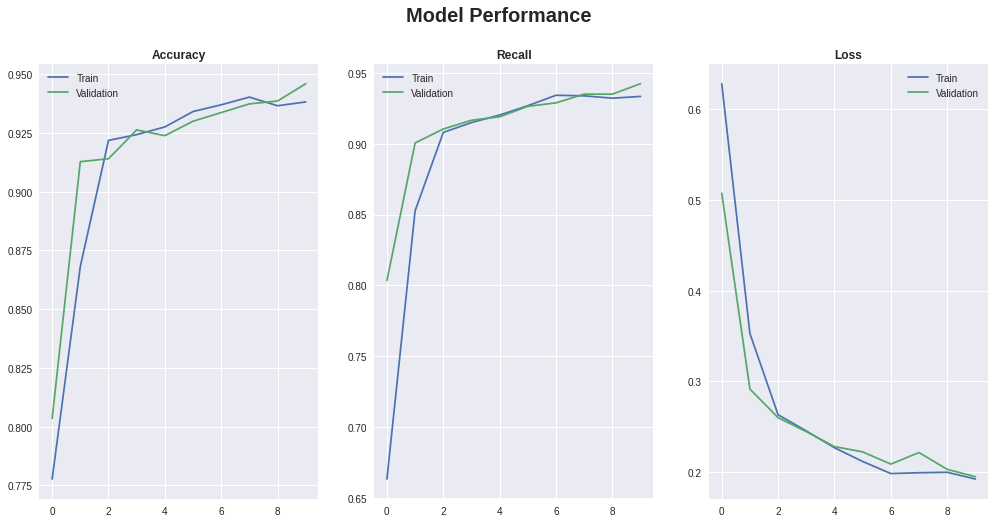

In [63]:
#plotting the lines of train and validate values returned
def plot_line(result,ax,col,title,train_col,valid_col):
    ax[col].plot(result[train_col])
    ax[col].plot(result[valid_col])
    
    ax[col].set_title(title,fontweight='bold')
    ax[col].legend(['Train','Validation'])
#plotting 3 graphs corresponding to accuracy, recall and loss
def plot_result(result,train_recol,valid_recol):
    fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(17,8))
    fig.suptitle('Model Performance', fontsize=20, fontweight='bold')
    
    plot_line(result,ax,0,'Accuracy','accuracy','val_accuracy')
    plot_line(result,ax,1,'Recall',train_recol,valid_recol)
    plot_line(result,ax,2,'Loss','loss','val_loss')
    plt.show()

#plotting the graphs for model1 result
plot_result(result1,'recall','val_recall')

###Early Stopping Callback

In [64]:
#creating model2 of sequentical cnn 
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = inputshape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [65]:
#compiling the losses of model2
model2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])
#EarlyStopping stop training when a monitored metric has stopped improving.
#val_loss is monitored where val_loss is losses occured during validation
# mode min signifies training will stop when the quantity monitored has stopped decreasing
#verbose 1 displays messages when the callback takes an action and patience represent number of epochs with no improvement after which training will be stopped
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]
#fitting model for 100 epoches but with callback
history2 = model2.fit(train_generator,
                        epochs = 100,
                        steps_per_epoch = len(train_generator),
                        validation_data = valid_generator,
                        validation_steps = len(valid_generator),
                        callbacks = callbacks)

Epoch 1/100
77/77 [==============================] - 4s 23ms/step - loss: 0.6222 - accuracy: 0.7916 - recall_1: 0.6795 - val_loss: 0.4982 - val_accuracy: 0.8034 - val_recall_1: 0.8022
Epoch 2/100
77/77 [==============================] - 2s 20ms/step - loss: 0.4238 - accuracy: 0.7929 - recall_1: 0.7871 - val_loss: 0.3371 - val_accuracy: 0.8047 - val_recall_1: 0.7875
Epoch 3/100
77/77 [==============================] - 2s 20ms/step - loss: 0.3158 - accuracy: 0.8530 - recall_1: 0.7994 - val_loss: 0.2689 - val_accuracy: 0.9214 - val_recall_1: 0.9017
Epoch 4/100
77/77 [==============================] - 2s 20ms/step - loss: 0.2386 - accuracy: 0.9337 - recall_1: 0.9296 - val_loss: 0.2289 - val_accuracy: 0.9238 - val_recall_1: 0.9201
Epoch 5/100
77/77 [==============================] - 2s 20ms/step - loss: 0.2239 - accuracy: 0.9321 - recall_1: 0.9267 - val_loss: 0.2154 - val_accuracy: 0.9287 - val_recall_1: 0.9263
Epoch 6/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2000

In [66]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result2 = pd.DataFrame(history2.history)
result2

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.622172,0.791650,0.679492,0.498160,0.803440,0.802211
1,0.423758,0.792878,0.787147,0.337140,0.804668,0.787469
2,0.315840,0.853050,0.799427,0.268857,0.921376,0.901720
3,0.238581,0.933688,0.929595,0.228875,0.923833,0.920147
4,0.223914,0.932051,0.926729,0.215390,0.928747,0.926290
5,0.199982,0.941056,0.935735,0.197815,0.939803,0.937346
6,0.184723,0.944331,0.941875,0.191428,0.942260,0.939803
7,0.180376,0.943921,0.939828,0.187744,0.947174,0.943489
8,0.173030,0.947196,0.941056,0.192428,0.945946,0.943489
9,0.168246,0.948833,0.944331,0.183119,0.943489,0.937346


<AxesSubplot:>

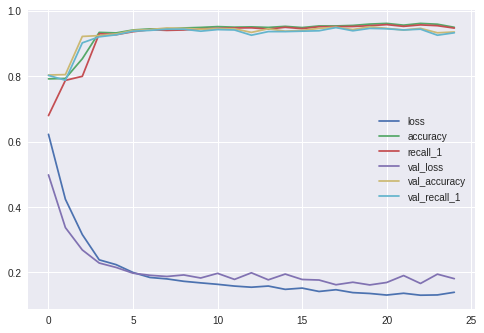

In [67]:
#plotting result
result2.plot()

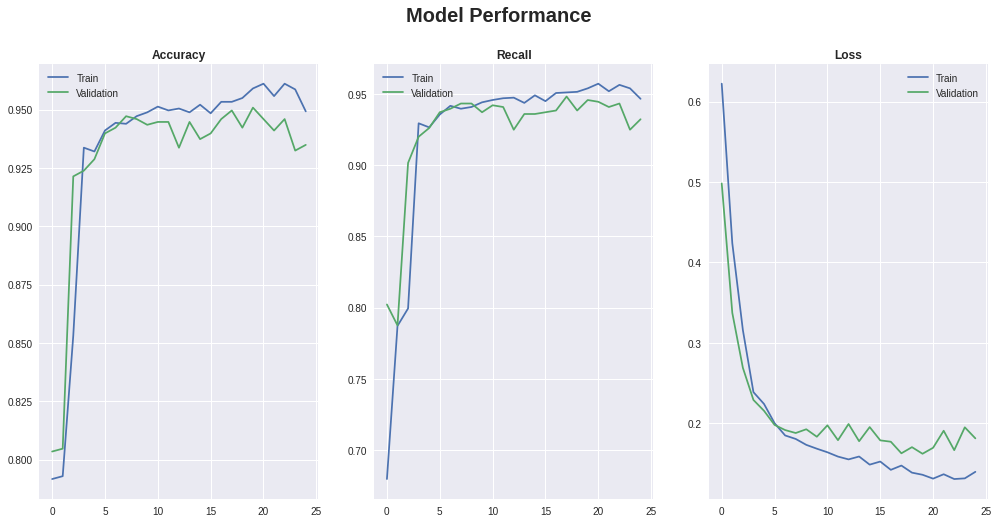

In [68]:
#plotting the graphs for model1 result
plot_result(result2, 'recall_1', 'val_recall_1')

###Accuracy

In [69]:
model1.evaluate(test_generator)
model2.evaluate(test_generator)

26/26 [==============================] - 0s 15ms/step - loss: 0.1912 - accuracy: 0.9362 - recall_1: 0.9252


[0.19119539856910706, 0.9361963272094727, 0.925153374671936]

Hence, model 1 is 94.6% and model 2 is 95.8% accurate.